<a href="https://colab.research.google.com/github/danielgfsuarez/tcml/blob/main/techchallange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploração de Dados

In [41]:
import pandas as pd

 Carregar a base de dados

In [42]:
dados = pd.read_csv('insurance.csv')

Mostrar as primeiras linhas da base de dados

In [43]:
print(dados.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Mostrar informações gerais sobre o dataframe

In [44]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Estatísticas descritivas

In [45]:
print(dados.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Visualizar distribuições relevantes

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribuição dos custos médicos

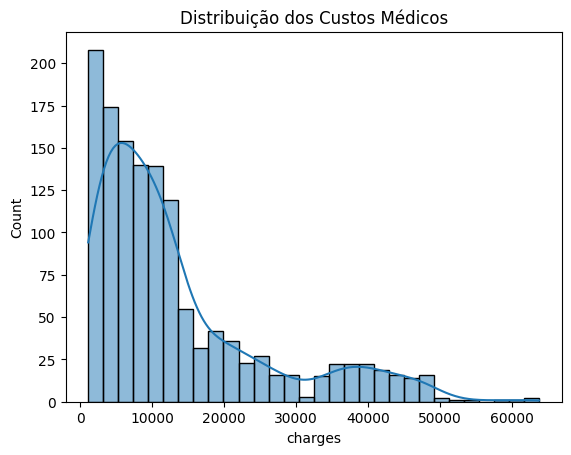

In [47]:
sns.histplot(dados['charges'], kde=True)
plt.title('Distribuição dos Custos Médicos')
plt.show()

Boxplot para comparar custos por região

<function matplotlib.pyplot.show(close=None, block=None)>

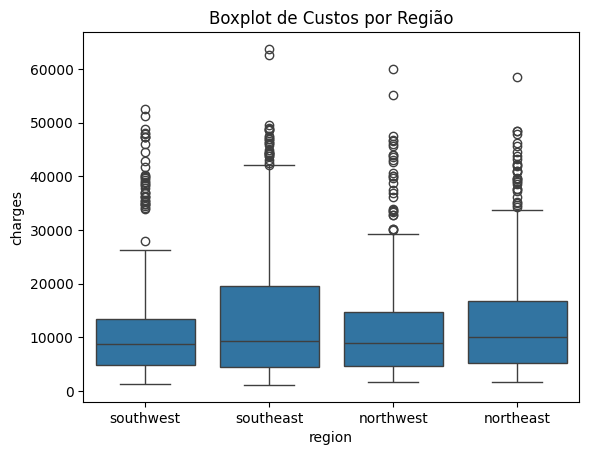

In [48]:

sns.boxplot(x='region', y='charges', data=dados)
plt.title('Boxplot de Custos por Região')
plt.show

# 2. Pré-processamento de Dados
Limpeza dos dados, tratando valores ausentes (se necessário) e convertendo variáveis categóricas.

Verificar valores ausentes

In [49]:
print(dados.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Converte variáveis categóricas em variáveis dummy

In [50]:
dados = pd.get_dummies(dados, columns=['sex', 'smoker', 'region'], drop_first=True)

Exibir as primeiras linhas do dataframe após a conversão

In [51]:
print(dados.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


# 3. Modelagem
Modelo preditivo de regressão utilizando Regressão Linear e dividimos o conjunto de dados em treinamento e teste.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Definir variáveis independentes (X) e dependente (y)

In [53]:
X = dados.drop('charges', axis=1)
y = dados['charges']

Dividir os dados em conjuntos de treinamento e teste

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinar o modelo de Regressão Linear

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Treinar o modelo de Árvore de Decisão

In [56]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#4. Treinamento e Avaliação do Modelo
Treinar os modelos e avaliar sua performance.

In [57]:
# Previsões com o modelo de Regressão Linear
y_pred_lr = lr.predict(X_test)

# Previsões com o modelo de Árvore de Decisão
y_pred_dt = dt.predict(X_test)

# Avaliação do modelo de Regressão Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Regressão Linear - MSE: {mse_lr}, R2: {r2_lr}')

# Avaliação do modelo de Árvore de Decisão
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Árvore de Decisão - MSE: {mse_dt}, R2: {r2_dt}')


Regressão Linear - MSE: 33596915.85136145, R2: 0.7835929767120724
Árvore de Decisão - MSE: 42446908.010150984, R2: 0.7265877305258355


# 5. Validação Estatística
Utilizar métricas estatísticas para validar a eficácia do modelo.

In [60]:
import statsmodels.api as sm

# Verificar os tipos de dados das variáveis
print(X_train.dtypes)
print(y_train.dtypes)

# Garantir que todas as variáveis são do tipo numérico
X_train_sm = sm.add_constant(X_train.astype(float))
X_test_sm = sm.add_constant(X_test.astype(float))
y_train_sm = y_train.astype(float)

# Ajustar o modelo de Regressão Linear usando statsmodels
model_sm = sm.OLS(y_train_sm, X_train_sm).fit()

# Resumo do modelo
print(model_sm.summary())



age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Thu, 16 May 2024   Prob (F-statistic):          1.32e-305
Time:                        02:56:13   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust      

# 6. Resultados Visuais
Apresentamos os resultados visuais, como gráficos de previsões vs. valores reais.

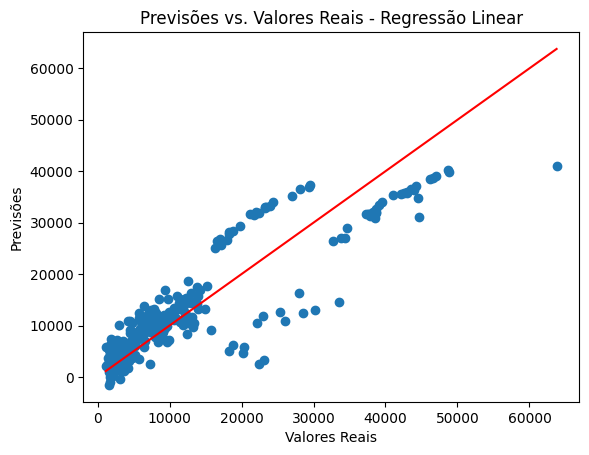

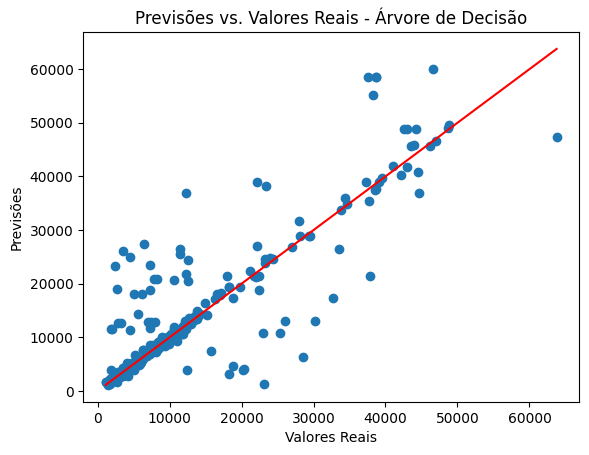

In [61]:
# Gráfico de previsões vs. valores reais para Regressão Linear
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Regressão Linear')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Gráfico de previsões vs. valores reais para Árvore de Decisão
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Árvore de Decisão')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
